In [1]:
# Import dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
import requests
import time

# Import API keys
import api_keys as api_key

# Incorporated citipy to determine city based on lat and long
from citipy import citipy

# Output file path as CSV
random_cities = "output_data/cities.csv"

# Range of latitudes and longitutes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# Determine lists for holding lat_longs and cities
lat_lngs = []
cities = []

# Determine a random set of lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify the nearest city for each combo of lat and lng
for lat_lngs in lat_lngs:
    city = citipy.nearest_city(lat_lngs[0], lat_lngs[1]).city_name
    
    # Account for any unique cities by adding to city list
    if city not in cities:
        cities.append(city)
        
# Print the city count 
len(cities)

cities_data = pd.DataFrame({"City":cities}) 
cities_data = cities_data.drop_duplicates('City')
cities_data.head()

,City
0,rikitea
1,atuona
2,tiksi
3,jammalamadugu
4,ilulissat


In [3]:
# Perform API Calls
# Introduce a base url for API Call
api_key = "8f14f2fbb3027c15b6d2457a6adca8f8"
#base_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 

# Set the initial row count to zero
row_count = 0

print("-------------------")
print("Beginning Data Retrieval")
print("-------------------")

# Loop through the cities and perform API Calls
for index, row in cities_data.iterrows():
    target_url = "http://api.openweathermap.org/data/2.5/weather?q=%s&units=IMPERIAL&appid=%s" %(row["City"], api_key)
    response = requests.get(target_url).json()
    print("Processing City #%s: %s" % (row_count + 1, cities_data.loc[index]["City"]))
    print(target_url)
    row_count += 1
    
    try:     
        cities_data.set_value(index, "Lat", response["coord"]["lat"])
        cities_data.set_value(index, "Lon", response["coord"]["lon"])
        cities_data.set_value(index, "Humidity", response["main"]["humidity"])
        cities_data.set_value(index, "Temp", response["main"]["temp"])
        cities_data.set_value(index, "Windspeed", response["wind"]["speed"])
        cities_data.set_value(index, "Cloudiness", response["clouds"]["all"])
        cities_data.set_value(index, "Date", response["dt"])
           
    except:
        print("City info not found... skip.")
        
print("---------------------")
print("End of Data Retrieval")
print("---------------------")

-------------------
Beginning Data Retrieval
-------------------
Processing City #1: rikitea
http://api.openweathermap.org/data/2.5/weather?q=rikitea&units=IMPERIAL&appid=8f14f2fbb3027c15b6d2457a6adca8f8


C:\Users\crfra\anaconda\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\crfra\anaconda\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\crfra\anaconda\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\crfra\anaconda\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\crfra\anaconda\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] acc

Processing City #2: atuona
http://api.openweathermap.org/data/2.5/weather?q=atuona&units=IMPERIAL&appid=8f14f2fbb3027c15b6d2457a6adca8f8
Processing City #3: tiksi
http://api.openweathermap.org/data/2.5/weather?q=tiksi&units=IMPERIAL&appid=8f14f2fbb3027c15b6d2457a6adca8f8
Processing City #4: jammalamadugu
http://api.openweathermap.org/data/2.5/weather?q=jammalamadugu&units=IMPERIAL&appid=8f14f2fbb3027c15b6d2457a6adca8f8
Processing City #5: ilulissat
http://api.openweathermap.org/data/2.5/weather?q=ilulissat&units=IMPERIAL&appid=8f14f2fbb3027c15b6d2457a6adca8f8
Processing City #6: hermanus
http://api.openweathermap.org/data/2.5/weather?q=hermanus&units=IMPERIAL&appid=8f14f2fbb3027c15b6d2457a6adca8f8
Processing City #7: mataura
http://api.openweathermap.org/data/2.5/weather?q=mataura&units=IMPERIAL&appid=8f14f2fbb3027c15b6d2457a6adca8f8
Processing City #8: vieux fort
http://api.openweathermap.org/data/2.5/weather?q=vieux fort&units=IMPERIAL&appid=8f14f2fbb3027c15b6d2457a6adca8f8
Processin

KeyboardInterrupt: 

In [4]:
# Convert to Pandas DataFrame
cities_data_pd = pd.DataFrame(cities_data)

# Focus on each factor being measured
lat = cities_data_pd["Lat"]
temp = cities_data_pd["Temp"]
humidity = cities_data_pd["Humidity"]
clouds = cities_data_pd["Cloudiness"]
wind_speed = cities_data_pd["Windspeed"]

# Export into CSV File
# cities_data_pd.to_csv(random_cities, index_label="City_ID")

cities_data.head()

,City,Lat,Lon,Humidity,Temp,Windspeed,Cloudiness,Date
0,rikitea,-23.12,-134.97,100.0,77.80,13.53,88.0,1.552340e+09
1,atuona,-9.80,-139.03,100.0,81.53,14.76,20.0,1.552340e+09
2,tiksi,71.64,128.87,50.0,-9.55,10.07,44.0,1.552340e+09
3,jammalamadugu,14.85,78.38,67.0,69.92,3.24,0.0,1.552340e+09
4,ilulissat,69.22,-51.10,65.0,8.60,8.05,75.0,1.552337e+09


In [5]:
# Plotting the Data
# Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
# Save the plotted figures as .pngs.

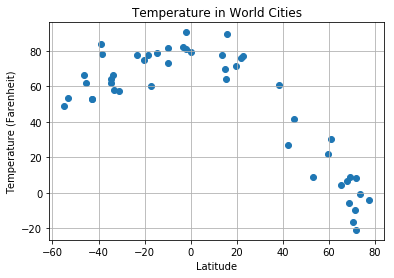

In [6]:
# Latitude vs. Temperature Plot

# Build a scatter plot for each data type
plt.scatter(lat, temp)

# Incorporate the other graph properties
plt.title("Temperature in World Cities")
plt.ylabel("Temperature (Farenheit)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the plotted figures as .pngs.
plt.savefig("TemperatureInWorldCities.png")

# Show plot
plt.show()

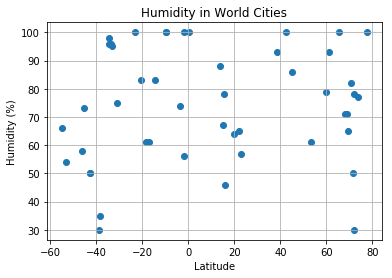

In [7]:
# Latitude vs. Humidity Plot

# Build a scatter plot for each data type
plt.scatter(lat, humidity)

# Incorporate the other graph properties
plt.title("Humidity in World Cities")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the plotted figures as .png
plt.savefig("HumidityInWorldCities.png")

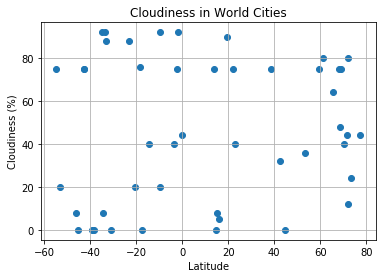

In [8]:
# Latitude vs. Cloudiness Plot

# Build a scatter plot for each data type
plt.scatter(lat, clouds)

# Incorporate the other graph properties
plt.title("Cloudiness in World Cities")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the plotted figures as .png
plt.savefig("CloudinessInWorldCities.png")

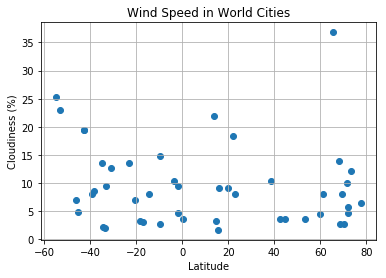

In [9]:
# Latitude vs. Wind Speed Plot

# Build a scatter plot for each data type
plt.scatter(lat, wind_speed)

# Incorporate the other graph properties
plt.title("Wind Speed in World Cities")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the plotted figures as .png
plt.savefig("WindSpeedInWorldCities.png")

In [ ]:
# Provide analysis of weather data in world cities:
# 1.) As cities across the world have a lower latitude (closer to the equator), they display a higher temperature in degrees farenheit. 
# 2.) Majority of world cities have a wind speed less than or equal to 20mph; however, there is a small positive correlation between cities that are further from the equator and have a higher wind speed. 
# 3.) There is no relationship between cloudiness and latitude, as the data appears to be neutral.
# 4.) There is no relationship between humidity and latitude, as the data appears to be neutral. 